<a href="https://colab.research.google.com/github/KieranDingwall/Natural-Language-Processing-Coursework---Kieran-Dingwall/blob/main/NLP_Coursework_V2_(Colab_Version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing Coursework

By Kieran Dingwall - Student Number: 2208619

### Section 1 - Dataset Exploring and Pre Processing

Dataset: https://archive.ics.uci.edu/dataset/837/product+classification+and+clustering

For my classification model, I will be using the ‘Product Classification and Clustering’ dataset that can be found on ‘UC Irvine Machine Learning Repository’. This dataset was taken from pricerunner, which is a popular product comparison platform. The dataset includes 35311 products in 10 different categories from 306 different merchants. The aim is to train the model to recognise different products and predict what product category they belong too.

In [2]:
# Imports
import pandas as pd
import numpy as np

# Load Dataset
from google.colab import files, drive #import colab functionality
drive.mount("/content/drive")
# Path to where mine is - This will need changed
path = '/content/drive/MyDrive/Uni/4th Year 1st Sem/Natural Language Processing/NLP Coursework/pricerunner_aggregate.csv'
product_data = pd.read_csv(path)
print(product_data)

Mounted at /content/drive
       Product ID  ...  Category Label
0               1  ...   Mobile Phones
1               2  ...   Mobile Phones
2               3  ...   Mobile Phones
3               4  ...   Mobile Phones
4               5  ...   Mobile Phones
...           ...  ...             ...
35306       47350  ...         Fridges
35307       47351  ...         Fridges
35308       47352  ...         Fridges
35309       47355  ...         Fridges
35310       47358  ...         Fridges

[35311 rows x 7 columns]


In [3]:
# Remove unused columns from data
product_df = product_data.drop(product_data.columns[[0, 2, 3, 5]], axis=1)
print(product_df)

                                           Product Title  ...  Category Label
0                        apple iphone 8 plus 64gb silver  ...   Mobile Phones
1                    apple iphone 8 plus 64 gb spacegrau  ...   Mobile Phones
2      apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...  ...   Mobile Phones
3                    apple iphone 8 plus 64gb space grey  ...   Mobile Phones
4      apple iphone 8 plus gold 5.5 64gb 4g unlocked ...  ...   Mobile Phones
...                                                  ...  ...             ...
35306  smeg fab28 60cm retro style right hand hinge f...  ...         Fridges
35307  smeg fab28 60cm retro style left hand hinge fr...  ...         Fridges
35308  smeg fab28 60cm retro style left hand hinge fr...  ...         Fridges
35309     candy 60cm built under larder fridge cru160nek  ...         Fridges
35310           neff k4316x7gb built under larder fridge  ...         Fridges

[35311 rows x 3 columns]


Exploring the dataset, there are 7 columns of data including Product ID, Product Title, Merchant ID, Cluster ID, Cluster Label, Category ID and Category Label. Most of these columns I will not need for the task so I decided to drop them from the dataframe leaving me the 2 necessary columns for my task, ‘Product Title’ and ‘Category Label’.

In [4]:
# Convert the feature columns into numpy array's
x = product_df["Product Title"].to_numpy()
y = product_df[" Category Label"].to_numpy()

# Testing outputs
#print(x)
#print(y)

Looking at the data in the ‘Product Title’ column, there are titles ranging from Iphones to washing machines, however, these titles also have extra information that won’t be needed and will be sorted in the pre-processing method. For example, from ‘sony hx400v compact camera with 50x optical zoom’, the keywords such as ‘camera’ should be pushed. As for ‘Category Label’, there are 10 different labels under the column including Mobile Phones, Fridge Freezers, Washing Machines, CPUs, Fridges, TVs, Dishwashers, Digital Cameras, Microwaves and Freezers.

In [5]:
# Checking Balance as well as seeing the data to work with

print(product_df["Product Title"].value_counts())
print(product_df[" Category Label"].value_counts())



Product Title
washing machine                                     90
built in fully integrated dishwasher                35
frost free fridge freezer                           34
washer dryer                                        24
american fridge freezer                             22
                                                    ..
sony rx10 ii bridgekamera 1 dscrx10m2                1
sony hx400v compact camera with 50x optical zoom     1
sony hx400 20mp 50x zoom bridge camera               1
sony cyber shot hx400 digital camera                 1
sony a7 iii body                                     1
Name: count, Length: 30993, dtype: int64
 Category Label
Fridge Freezers     5501
Mobile Phones       4081
Washing Machines    4044
CPUs                3862
Fridges             3584
TVs                 3564
Dishwashers         3424
Digital Cameras     2697
Microwaves          2342
Freezers            2212
Name: count, dtype: int64


For pre-processing, I chose to use tokenisation and lemmatizer. I initially used stemming, utilising the snowball stemmer, but found that it just took away letters from the end of words rather than finding a more common alternative for that word, making it not very effective. With the lemmatizer, it uses a detailed dictionary of pre-defined words to always make sure a relevant and more common alternative to each word is returned. This proved to be much more accurate when looking through a sample of the data after going through both pre-processing methods separately.

In [6]:
# Pre-Processing using tokenisation and lemmatizer

from sklearn.base import BaseEstimator, TransformerMixin
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def prep(X):
  prep_text = []
  wnl = WordNetLemmatizer() # Initialise Lemmatizer
  for x in X:
        token_text = word_tokenize(x)
        normd_text = [token.lower() for token in token_text if token.isalpha()]

        swr_text = [token for token in normd_text if token not in stopwords.words('english')]

        prep_text += [[wnl.lemmatize(word, pos="v") for word in swr_text]]

  prep_sentences = [" ".join(sentence) for sentence in prep_text]
  return prep_sentences




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Section 2 - Representation Learning

For my representation learner, I have decided to use TfidfVectorizer from the SKLearn language toolkit. It is commonly used to convert collections of raw data into a matrix of TF-IDF. It starts by tokenizing the text, splitting it into words or n-grams, then builds a vocabulary of known words allowing for each word to be given an TF-IDF score, which suggests how relevant each word is, and outputs a sparse matrix that can be used by pipelines or models. This works for my dataset as it highlights the important words that are in each product title. For example, for the record ‘apple iphone 8 plus 64gb silver’, it would find the important word phone, as well as weighing down more less important common words found in multiple titles such as ‘plus’ which makes it easier for it to be classified in the category ‘Mobile Phones’.  

In [7]:
# Representation Learner - Vectorising

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_base = TfidfVectorizer(max_features=2000)


### Section 3 - Algorithms

Algorithm 1 - K-Nearest Neighbour (kNN)

kNN is an algorithm used for text classification and works on a similarity based method. A kNN algorithm is designed to predict the label of data points based on the labels of its k closest neighbours, k being the amount of neighbours it checks. For my model, I build this into a pipeline which also uses my pre-processing function and representation learner. The kNN then measures the distance from the current data point to all other points in the training set. After this it sorts the training points by distance and selects the k closest neighbours. Finally, the model predicts the label of each product by taking a majority vote between the k neighbour labels and returns the predicted label for the product. I decided to use a grid search for my kNN which went through each number of neighbours and parameters to make the model as accurate as possible. I chose kNN as one of my models because it is able to naturally handle multi-class problems while still being simple and fast and fits the dataset well as most products have similar words in their title to their respective labels.


Warning: The code below has been commented out as it takes 1 hour to run, testing over 30 models, so a ‘quicker version’ with the best params and neighbours hardcoded can be found directly underneath this block and is labelled with a comment. To see output feel free to uncomment.

In [8]:
"""

# Testing with K-Nearest Neighbour in a pipeline

# SKLearn Imports
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV



knn_acc_score = []

# Creates a FunctionTransformer for the prep function
prep_transformer = FunctionTransformer(prep, validate=False)

pipeline = Pipeline([
  ('prep', prep_transformer),
  ('rep', TfidfVectorizer()),
  ('mod', KNeighborsClassifier(n_neighbors=3))
])

# Using GridSearch to find best parameters for pipeline
# Define parameter grid for GridSearch
param_grid = {
    'mod__n_neighbors': [1, 3, 5, 7, 9],
    'mod__weights': ['uniform', 'distance'],
    'mod__metric': ['euclidean', 'manhattan', 'cosine']
}

kf = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='accuracy', n_jobs=1)
grid_search.fit(x, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)
"""

'\n\n# Testing with K-Nearest Neighbour in a pipeline\n\n# SKLearn Imports\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.feature_extraction.text import CountVectorizer\nfrom sklearn.feature_extraction.text import TfidfTransformer\nfrom sklearn.svm import SVC\nfrom sklearn.preprocessing import FunctionTransformer\nfrom sklearn.model_selection import GridSearchCV\n\n\n\nknn_acc_score = []\n\n# Creates a FunctionTransformer for the prep function\nprep_transformer = FunctionTransformer(prep, validate=False)\n\npipeline = Pipeline([\n  (\'prep\', prep_transformer),\n  (\'rep\', TfidfVectorizer()),\n  (\'mod\', KNeighborsClassifier(n_neighbors=3))\n])\n\n# Using GridSearch to find best parameters for pipeline\n# Define parameter grid for GridSearch\nparam_grid = {\n    \'mod__n_neighbors\': [1, 3, 5, 7, 9],\n    \'mod__weights\': [\'unifo

In [10]:
# Testing with K-Nearest Neighbour in a pipeline (Quicker version)
# Gemini used to help with error handling
# SKLearn Imports
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer

knn_acc_score = []
knn_f1_score = []

# Creates a FunctionTransformer for the prep function
prep_transformer = FunctionTransformer(prep, validate=False)

pipeline = Pipeline([
  ('prep', prep_transformer),
  ('rep', TfidfVectorizer()),
  ('mod', KNeighborsClassifier(n_neighbors=9, weights='distance', metric='cosine'))
])

kf = StratifiedKFold(n_splits=5)

for train, test in kf.split(x,y):
  x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]

  pipeline.fit(x_train, y_train)
  predictions = pipeline.predict(x_test)
  acc = accuracy_score(predictions, y_test)
  f1 = f1_score(y_test, predictions, average='macro')
  knn_acc_score.append(acc)
  knn_f1_score.append(f1)

print("Accuracy:", np.mean(knn_acc_score))
print("F1 Score:", np.mean(knn_f1_score))

Accuracy: 0.8908551041596622
F1 Score: 0.888517170247345


Algorithm 2 - Multi-Layer Perception (MLP)

A MLP is a type of neural algorithm which gets built up by many different neural layers. It is commonly used for text classification tasks like this one. The one that I use is a sequential model which means each layer is run in order of how they are coded. I decided on 3 layers, the first one being the input layer. The input layer takes the raw data values, which in my case is the TF-IDF scores from my representation learner. I have then used a hidden layer where a weighted sum is used to perform a ‘relu’ function. Finally, there is the output layer which produces a final prediction using softmax activation. I then use the model for testing by looping through the arrays and running the model on each data point.


In [11]:
# Testing with Multi Layer Perception to compare accuracy scores
# Gemini used to help with error handling
# Tensorflow imports
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# SKLearn Imports
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer

def mlp(input_dimension, num_classes):
  model = Sequential()
  model.add(Dense(128, input_shape=(input_dimension,), activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  return model

kf = StratifiedKFold(n_splits=5, shuffle=True)
xnp = np.array(x) #convert to numpy to standardise the arrays for the split
ynp = np.array(y)

# Define NUM_CLASSES and label_to_int mapping
unique_labels = np.unique(ynp)
NUM_CLASSES = len(unique_labels)
label_to_int = {label: i for i, label in enumerate(unique_labels)}

# Define TFIDF_MAX_FEATURES
TFIDF_MAX_FEATURES = tfidf_base.max_features

mlp_acc_score = []
mlp_f1_score = []

for train, test in kf.split(xnp,ynp):
  x_train, x_test, y_train, y_test = xnp[train], xnp[test], ynp[train], ynp[test]

  # preprocess our train and test datasets
  x_train = prep(x_train)
  x_test = prep(x_test)

  # Instantiate TfidfVectorizer for each fold to prevent data leakage
  tfidf_vectorizer = tfidf_base
  x_train = tfidf_vectorizer.fit_transform(x_train)
  x_train = x_train.todense()
  x_test = tfidf_vectorizer.transform(x_test)
  x_test = x_test.todense()

  # Encode string labels to integers before one-hot encoding
  y_train_encoded = np.array([label_to_int[label] for label in y_train])
  y_test_encoded = np.array([label_to_int[label] for label in y_test])

  model = mlp(TFIDF_MAX_FEATURES, NUM_CLASSES)
  y_train_one_hot = to_categorical(y_train_encoded, NUM_CLASSES)
  y_test_one_hot = to_categorical(y_test_encoded, NUM_CLASSES)

  # Configure the model and start training
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(x_train, y_train_one_hot, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

  # Test the model after training
  test_results = model.evaluate(x_test, y_test_one_hot, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

  # Predict F1
  y_pred_probs = model.predict(x_test)
  y_pred_labels = np.argmax(y_pred_probs, axis=1)

  f1 = f1_score(y_test_encoded, y_pred_labels, average='macro')

  mlp_acc_score.append(test_results[1])
  mlp_f1_score.append(f1)

print("Accuracy:", np.mean(mlp_acc_score))
print("F1 Score:", np.mean(mlp_f1_score))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6202 - loss: 1.7756 - val_accuracy: 0.3366 - val_loss: 3.7762
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9655 - loss: 0.1381 - val_accuracy: 0.4044 - val_loss: 4.4717
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9735 - loss: 0.0861 - val_accuracy: 0.4112 - val_loss: 4.8442
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9761 - loss: 0.0723 - val_accuracy: 0.4253 - val_loss: 4.9832
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9759 - loss: 0.0671 - val_accuracy: 0.4142 - val_loss: 5.1790
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9765 - loss: 0.0647 - val_accuracy: 0.4196 - val_loss: 5.3366
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9760 - loss: 0.0636 - val_accuracy: 0.4200 - val_loss: 5.3966
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9749 - loss: 0.0656 - val_accuracy: 0.4156 - v

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6438 - loss: 1.7592 - val_accuracy: 0.3699 - val_loss: 3.9485
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9658 - loss: 0.1354 - val_accuracy: 0.4058 - val_loss: 4.6905
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9741 - loss: 0.0825 - val_accuracy: 0.4028 - val_loss: 5.0115
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9756 - loss: 0.0728 - val_accuracy: 0.4011 - val_loss: 5.2276
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9755 - loss: 0.0718 - val_accuracy: 0.4046 - val_loss: 5.4363
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9754 - loss: 0.0685 - val_accuracy: 0.4106 - val_loss: 5.5495
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9766 - loss: 0.0654 - val_accuracy: 0.4200 - val_loss: 5.6740
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9776 - loss: 0.0628 - val_accuracy: 0.3986 - v

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5918 - loss: 1.7676 - val_accuracy: 0.3481 - val_loss: 3.9719
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9624 - loss: 0.1401 - val_accuracy: 0.4000 - val_loss: 4.5692
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9711 - loss: 0.0862 - val_accuracy: 0.4011 - val_loss: 4.9085
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9761 - loss: 0.0685 - val_accuracy: 0.4087 - val_loss: 5.1119
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9722 - loss: 0.0751 - val_accuracy: 0.4127 - val_loss: 5.3109
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9736 - loss: 0.0687 - val_accuracy: 0.4064 - val_loss: 5.4614
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9753 - loss: 0.0635 - val_accuracy: 0.4035 - val_loss: 5.3709
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9755 - loss: 0.0650 - val_accuracy: 0.4078 - v

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6122 - loss: 1.7717 - val_accuracy: 0.3674 - val_loss: 3.9405
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9667 - loss: 0.1295 - val_accuracy: 0.3959 - val_loss: 4.7600
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9731 - loss: 0.0811 - val_accuracy: 0.4117 - val_loss: 5.1987
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9737 - loss: 0.0744 - val_accuracy: 0.4112 - val_loss: 5.3655
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9733 - loss: 0.0685 - val_accuracy: 0.4143 - val_loss: 5.5970
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9740 - loss: 0.0692 - val_accuracy: 0.3968 - val_loss: 5.7719
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9731 - loss: 0.0706 - val_accuracy: 0.4108 - val_loss: 5.8905
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9759 - loss: 0.0624 - val_accuracy: 0.4145 - v

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6225 - loss: 1.7770 - val_accuracy: 0.3763 - val_loss: 3.7604
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9669 - loss: 0.1370 - val_accuracy: 0.3834 - val_loss: 4.5809
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9712 - loss: 0.0835 - val_accuracy: 0.4057 - val_loss: 4.8727
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9727 - loss: 0.0737 - val_accuracy: 0.4083 - val_loss: 5.1268
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9749 - loss: 0.0703 - val_accuracy: 0.4182 - val_loss: 5.2197
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9753 - loss: 0.0650 - val_accuracy: 0.4181 - val_loss: 5.4279
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9777 - loss: 0.0610 - val_accuracy: 0.4150 - val_loss: 5.5704
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9751 - loss: 0.0604 - val_accuracy: 0.4244 - v

### Section 4 - Evaluation

Looking at each algorithm’s performance, the kNN algorithm produced an accuracy score of 0.851, however had a wider range of scores from 0.80 to 0.88, making it a slightly inconsistent model. However, the MLP model had a very similar average score with roughly 0.859, but was a more consistent model giving similar scores for each run.

[Text(1, 0, 'knn'), Text(2, 0, 'mlp')]

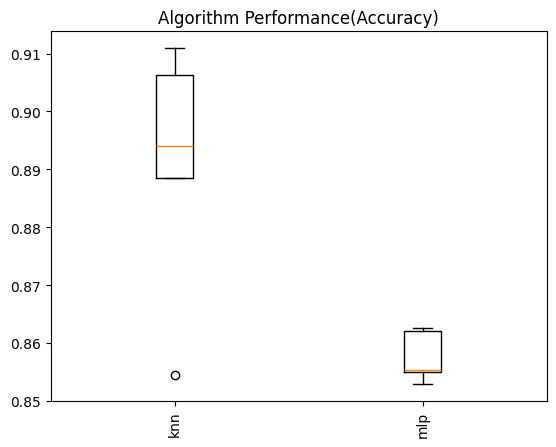

In [12]:
import matplotlib as plt

model_comp = []
model_comp.append(knn_acc_score)
model_comp.append(mlp_acc_score)

fig, ax2 = plt.pyplot.subplots()
ax2.set_title('Algorithm Performance(Accuracy)')
ax2.boxplot(model_comp)
ax2.set_xticklabels(['knn', 'mlp'], rotation='vertical')

Looking at this, the MLP is the better algorithm for consistency in accuracy, but the kNN has the capability to produce higher accuracy scores with more variability.

[Text(1, 0, 'knn'), Text(2, 0, 'mlp')]

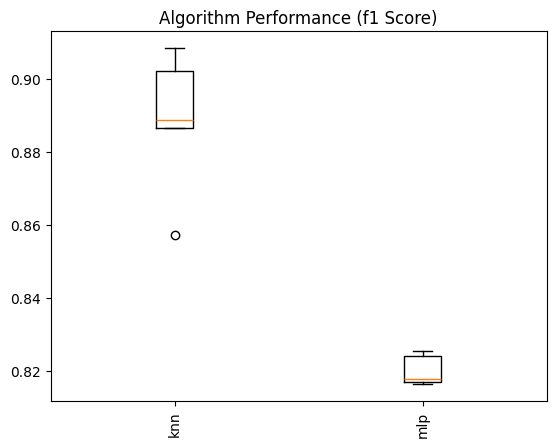

In [13]:
model_comp = []
model_comp.append(knn_f1_score)
model_comp.append(mlp_f1_score)

fig, ax2 = plt.pyplot.subplots()
ax2.set_title('Algorithm Performance (f1 Score)')
ax2.boxplot(model_comp)
ax2.set_xticklabels(['knn', 'mlp'], rotation='vertical')

Looking at the f1 Scores, this shows that the knn model balances out false positives and negatives much better than the mlp model, meaning that the knn is more consistent for this task.

Overall, the kNN is the better performing model with better accuracy scores and more consistent f1 scores. In this scenario, the mlp could be tested to find better layering options, however with the resources that are available and heaps of combinations, it would take an exceedingly long time.   

Generative AI was used to support completion of this assessment. The GenAI tool Gemini was used for the purpose of editing.
Where used for the purpose of supporting development, comments have been provided against relevant cells.